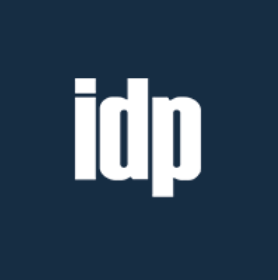

# TRABALHO FINAL

## Ciência de Dados Aplicada à Negócios

### Mayara Gasparoto Tonin
### RA 2111004

### Dezembro de 2022

## COLETA E MANIPULAÇÃO DOS DADOS

In [1]:
from google.colab import drive 

from google.colab import files

import pandas as pd 

import seaborn as sn

import numpy as np

import matplotlib.pyplot as plt

In [12]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
Tabela = '/content/drive/My Drive/empreendimento-operacao-historico-vf.xlsx'
tabela = pd.read_excel(Tabela)

In [14]:
display(tabela)

,DatGeracaoConjuntoDados,SigTipoGeracao,QtdUsinasPeriodo,MdaPotenciaInstaladaKW,MesReferencia,AnoReferencia
0,2022-11-01,CGH,0,0.000000e+00,12,2001
1,2022-11-01,EOL,7,2.100000e+04,12,2001
2,2022-11-01,PCH,303,8.550000e+05,12,2001
3,2022-11-01,UFV,0,0.000000e+00,12,2001
4,2022-11-01,UHE,133,6.155400e+07,12,2001
...,...,...,...,...,...,...
392,2022-11-01,UFV,14624,6.457904e+06,9,2022
393,2022-11-01,PCH,425,5.599639e+06,9,2022
394,2022-11-01,UHE,216,1.031897e+08,9,2022
395,2022-11-01,UTE,3126,4.562674e+07,9,2022


A visualização da tabela fornece uma ideia dos dados que foram coletados do site do Ministério de Minas e Energia, que disponibilizou informações acerca das diversas fontes de energia elétrica no Brasil nos últimos 20 anos.

### Total de usinas de geração de energia no Brasil

In [15]:
Total_Usinas = tabela['QtdUsinasPeriodo'].sum()
Total_Usinas

291942

Há quase 300 mil usinas de geração de energia no Brasil.

### Total de capacidade instalada no Brasil

In [16]:
Total_Capacidade = tabela['MdaPotenciaInstaladaKW'].sum()
Total_Capacidade

7570441329.380001

A capacidade instalada no Brasil é de mais de 7.500 GW. Em outras palavras, essa é a potência de geração de energia elétrica do país.

### Fontes de geração de energia no Brasil

In [21]:
Total_Tipo_Geracao = tabela[["SigTipoGeracao", "QtdUsinasPeriodo"]].groupby(["SigTipoGeracao"]).sum()
Total_Tipo_Geracao

,QtdUsinasPeriodo
SigTipoGeracao,
CGH,27916
CGU,19
EOL,18809
PCH,22258
UFV,88257
UHE,10720
UTE,123855
UTN,108


Existem diversas fontes de geração de energia no Brasil. 
São mais de 60 mil hidrelétricas: CGH (Centrais Geradoras Hidrelétricas), PCH (Pequenas Centrais Hidrelétricas) e UHE (Usinas Hidrelétricas). 
As térmicas (UTE) e as fotovoltaicas (UFV) também possuem número expressivo: mais de 120 mil e quase 90 mil, respectivamente. Por sua vez, as eólicas (EOL) são apenas cerca de 19 mil.

### Capacidade das fontes de energia no Brasil

In [22]:
Total_Tipo_Capacidade = tabela[["SigTipoGeracao", "MdaPotenciaInstaladaKW"]].groupby(["SigTipoGeracao"]).sum()
Total_Tipo_Capacidade

,MdaPotenciaInstaladaKW
SigTipoGeracao,
CGH,2.458596e+07
CGU,9.500000e+02
EOL,4.622385e+08
PCH,2.345826e+08
UFV,5.938802e+07
UHE,4.746487e+09
UTE,1.935468e+09
UTN,1.076910e+08


A capacidade de geração de energia hidrelétrica é muito maior do que todas as outras: pouco mais de 5 mil GW. Representa cerca de 66% da matriz energética brasileira (cerca de 7.500 GW). As térmicas têm capacidade total de cerca de 1.900 GW, as eólicas de 462 GW e as fotovoltaicas de 59 GW.

### Quantidade de usinas por ano

In [23]:
Total_Usinas_Ano = tabela[["QtdUsinasPeriodo", "AnoReferencia"]].groupby(["AnoReferencia"]).sum()
Total_Usinas_Ano

,QtdUsinasPeriodo
AnoReferencia,
2001,1045
2002,1155
2003,1264
2004,1345
2005,1480
2006,1596
2007,1681
2008,1994
2009,2180


O aumento anual da quantidade de usinas no país é evidente, sobretudo nos últimos 10 anos.

## GRÁFICOS DOS PRINCIPAIS DADOS

### Quantidade de usinas por tipo de empreendimento

Text(0.5, 1.0, 'Tipos de Usinas / Quantidades de Usinas')

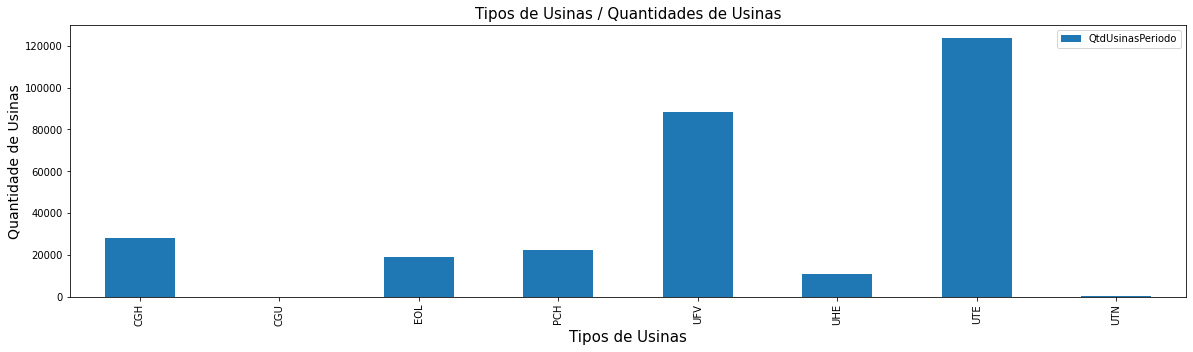

In [19]:
Total_TipoUsina = tabela[["SigTipoGeracao", "QtdUsinasPeriodo"]].groupby(["SigTipoGeracao"]).sum()

ax = Total_TipoUsina.plot.bar()
ax.figure.set_size_inches(20,5)
plt.xlabel("Tipos de Usinas",size=15)
plt.ylabel("Quantidade de Usinas",size=14)
plt.title("Tipos de Usinas / Quantidades de Usinas",size=15)

Esse gráfico ilustra a expressiva quantidade de usinas termelétricas no Brasil e esconde a real predominância da matriz hidrelétrica, composta por três barras diferentes (CGH, PCH e UHE).

### Capacidade instalada por tipo de usina

Text(0.5, 1.0, 'Tipos de Usinas / Capacidade Instalada')

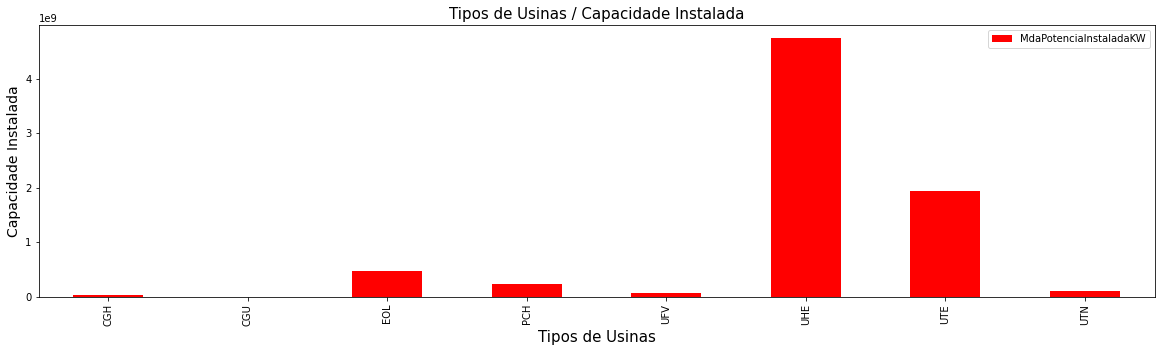

In [25]:
Total_TipoUsina = tabela[["SigTipoGeracao", "MdaPotenciaInstaladaKW"]].groupby(["SigTipoGeracao"]).sum()

ax = Total_TipoUsina.plot.bar(color='red')
ax.figure.set_size_inches(20,5)
plt.xlabel("Tipos de Usinas",size=15)
plt.ylabel("Capacidade Instalada",size=14)
plt.title("Tipos de Usinas / Capacidade Instalada",size=15)

Esse gráfico é mais fiel à realidade no sentido de produção de energia, pois fica evidente a predominância da matriz hidrelétrica no país, representada sobretudo pelas grandes hidrelétricas (UHE).

### Evolução histórica da quantidade de usinas no Brasil

Text(0.5, 1.0, 'Quantidade de Usinas / Evolução Histórica')

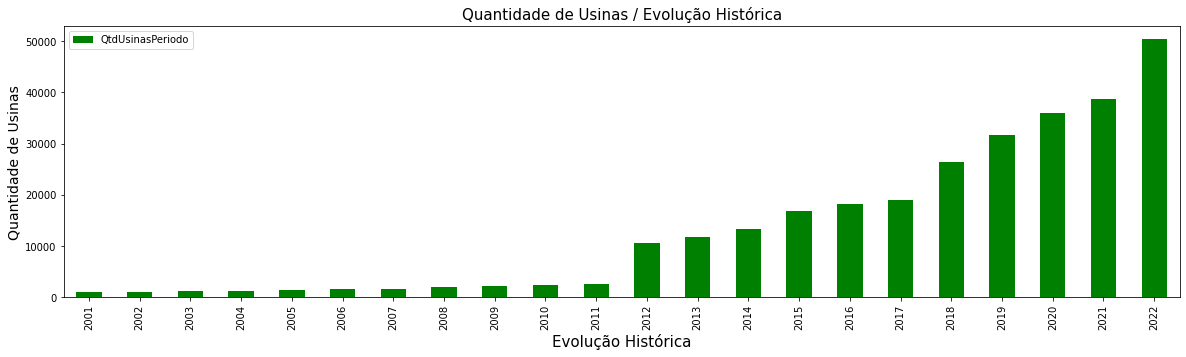

In [20]:
Total_TipoUsinaAno = tabela[["QtdUsinasPeriodo", "AnoReferencia"]].groupby(["AnoReferencia"]).sum()

ax = Total_TipoUsinaAno.plot.bar(color="green")
ax.figure.set_size_inches(20,5)
plt.xlabel("Evolução Histórica",size=15)
plt.ylabel("Quantidade de Usinas",size=14)
plt.title("Quantidade de Usinas / Evolução Histórica",size=15)

Esse gráfico demonstra a evolução gradativa das usinas de geração de energia no Brasil, ficando evidente seu crescimento, sobretudo nos últimos 10 anos. 

Text(0.5, 1.0, 'Capacidade Instalada / Evolução Histórica')

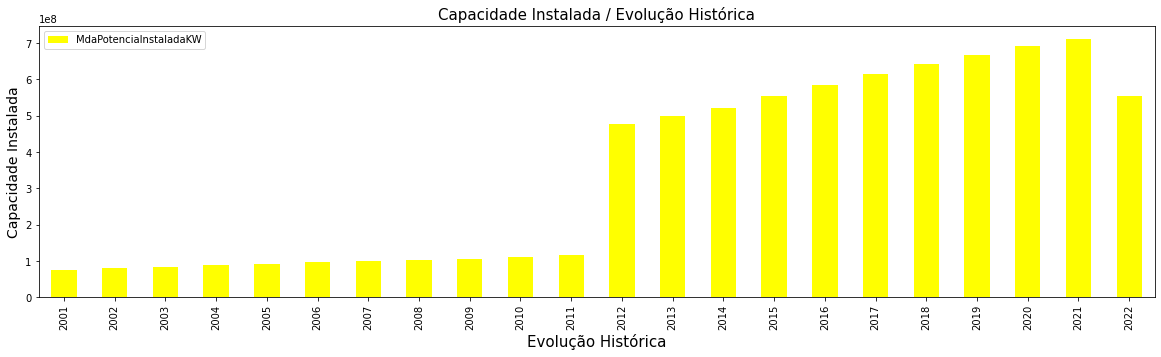

In [26]:
Total_TipoUsinaAno = tabela[["MdaPotenciaInstaladaKW", "AnoReferencia"]].groupby(["AnoReferencia"]).sum()

ax = Total_TipoUsinaAno.plot.bar(color="yellow")
ax.figure.set_size_inches(20,5)
plt.xlabel("Evolução Histórica",size=15)
plt.ylabel("Capacidade Instalada",size=14)
plt.title("Capacidade Instalada / Evolução Histórica",size=15)

Esse gráfico demonstra que, muito embora a quantidade de usinas tenham aumentado expressivamente nos últimos 10 anos, a capacidade instalada aumentou pouco, tendo inclusive diminuído no presente ano.

## CONCLUSÕES

Os dados coletados demonstraram a evolução quantitativa da geração de energia no Brasil tanto no que tange ao número de usinas quanto em relação à capacidade instalada (potência). Apesar da maior quantidade de usinas termelétricas, os dados confirmaram a maior expressividade da matriz hidrelétrica no país. 

Os dados também demonstraram uma grande evolução ao longo dos anos relativamente à quantidade de usinas construídas, mas evidenciaram que o mesmo aumento não ocorreu em relação à capacidade instalada de energia. Nesse ponto, a potência instalada mostrou um aumento expressivo entre 2011 e 2012, mantendo pequenos aumentos anuais, com exceção de um decréscimo no último ano. 

Talvez isso decorra do aumento de pequenas centrais hidrelétricas e de usinas fotovoltaicas em pequenas propriedades. Porém, não foram analisados dados para confirmar essa hipótese.